In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/thisismyproff/Projects/main/PROJECT/Project%207(Sales%20prediction)/Big%20Sales%20Data.csv'
df = pd.read_csv(url,encoding='unicode_escape')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [6]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [9]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0}},inplace=True)

In [10]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [11]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':1,'Household':2,'Frozen Foods':0,
                        'Dairy':0,'Baking Goods':2,'Canned':3,'Health and Hygiene':0,'Meat':5,
                        'Soft Drinks':4,'Breads':1,'Hard Drinks':4,'Others':2,'Starchy Foods':5,
                        'Breakfast':1,'Seafood':5}},inplace=True)

In [12]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [13]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,'OUT046':3,'OUT035':4,
             'OUT045':5,'OUT018':6,'OUT017':7,'OUT010':8,'OUT019':9}},inplace=True)

In [14]:
df['Outlet_Size'].value_counts()

Medium    7122
Small     5529
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
df.replace({'Outlet_Size':{'Medium':0,'Small':1,'High':2}},inplace=True)

In [16]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [17]:
df.replace({'Outlet_Location_Type':{'Tier 3':0,'Tier 2':1,'Tier 1':2}},inplace=True)

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [19]:
df.replace({'Outlet_Type':{'Supermarket Type1':0,'Grocery Store':1,'Supermarket Type3':1,'Supermarket Type2':1}},inplace=True)

In [20]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.032692,-0.014176,-0.045725,0.034502,-0.001995,0.001258,0.001245,0.001998,-0.002390,0.160823
Item_Fat_Content,-0.032692,1.000000,0.044274,-0.027070,-0.004019,0.000406,0.000137,-0.000259,-0.001373,0.000943,-0.002852
Item_Visibility,-0.014176,0.044274,1.000000,-0.024612,-0.006351,0.180776,-0.083678,-0.012030,0.017362,0.148925,-0.158813
Item_Type,-0.045725,-0.027070,-0.024612,1.000000,-0.013652,-0.002142,0.002223,-0.000599,-0.001920,-0.002098,-0.003854
Item_MRP,0.034502,-0.004019,-0.006351,-0.013652,1.000000,-0.000683,0.000141,-0.000244,-0.000838,-0.000176,0.532261
Outlet_Identifier,-0.001995,0.000406,0.180776,-0.002142,-0.000683,1.000000,0.482064,-0.230966,0.129407,0.235669,-0.277406
Outlet_Establishment_Year,0.001258,0.000137,-0.083678,0.002223,0.000141,0.482064,1.000000,-0.375603,0.089328,-0.245260,-0.110786
Outlet_Size,0.001245,-0.000259,-0.012030,-0.000599,-0.000244,-0.230966,-0.375603,1.000000,0.038250,-0.460920,-0.067836
Outlet_Location_Type,0.001998,-0.001373,0.017362,-0.001920,-0.000838,0.129407,0.089328,0.038250,1.000000,-0.472822,-0.094415
Outlet_Type,-0.002390,0.000943,0.148925,-0.002098,-0.000176,0.235669,-0.245260,-0.460920,-0.472822,1.000000,0.016256


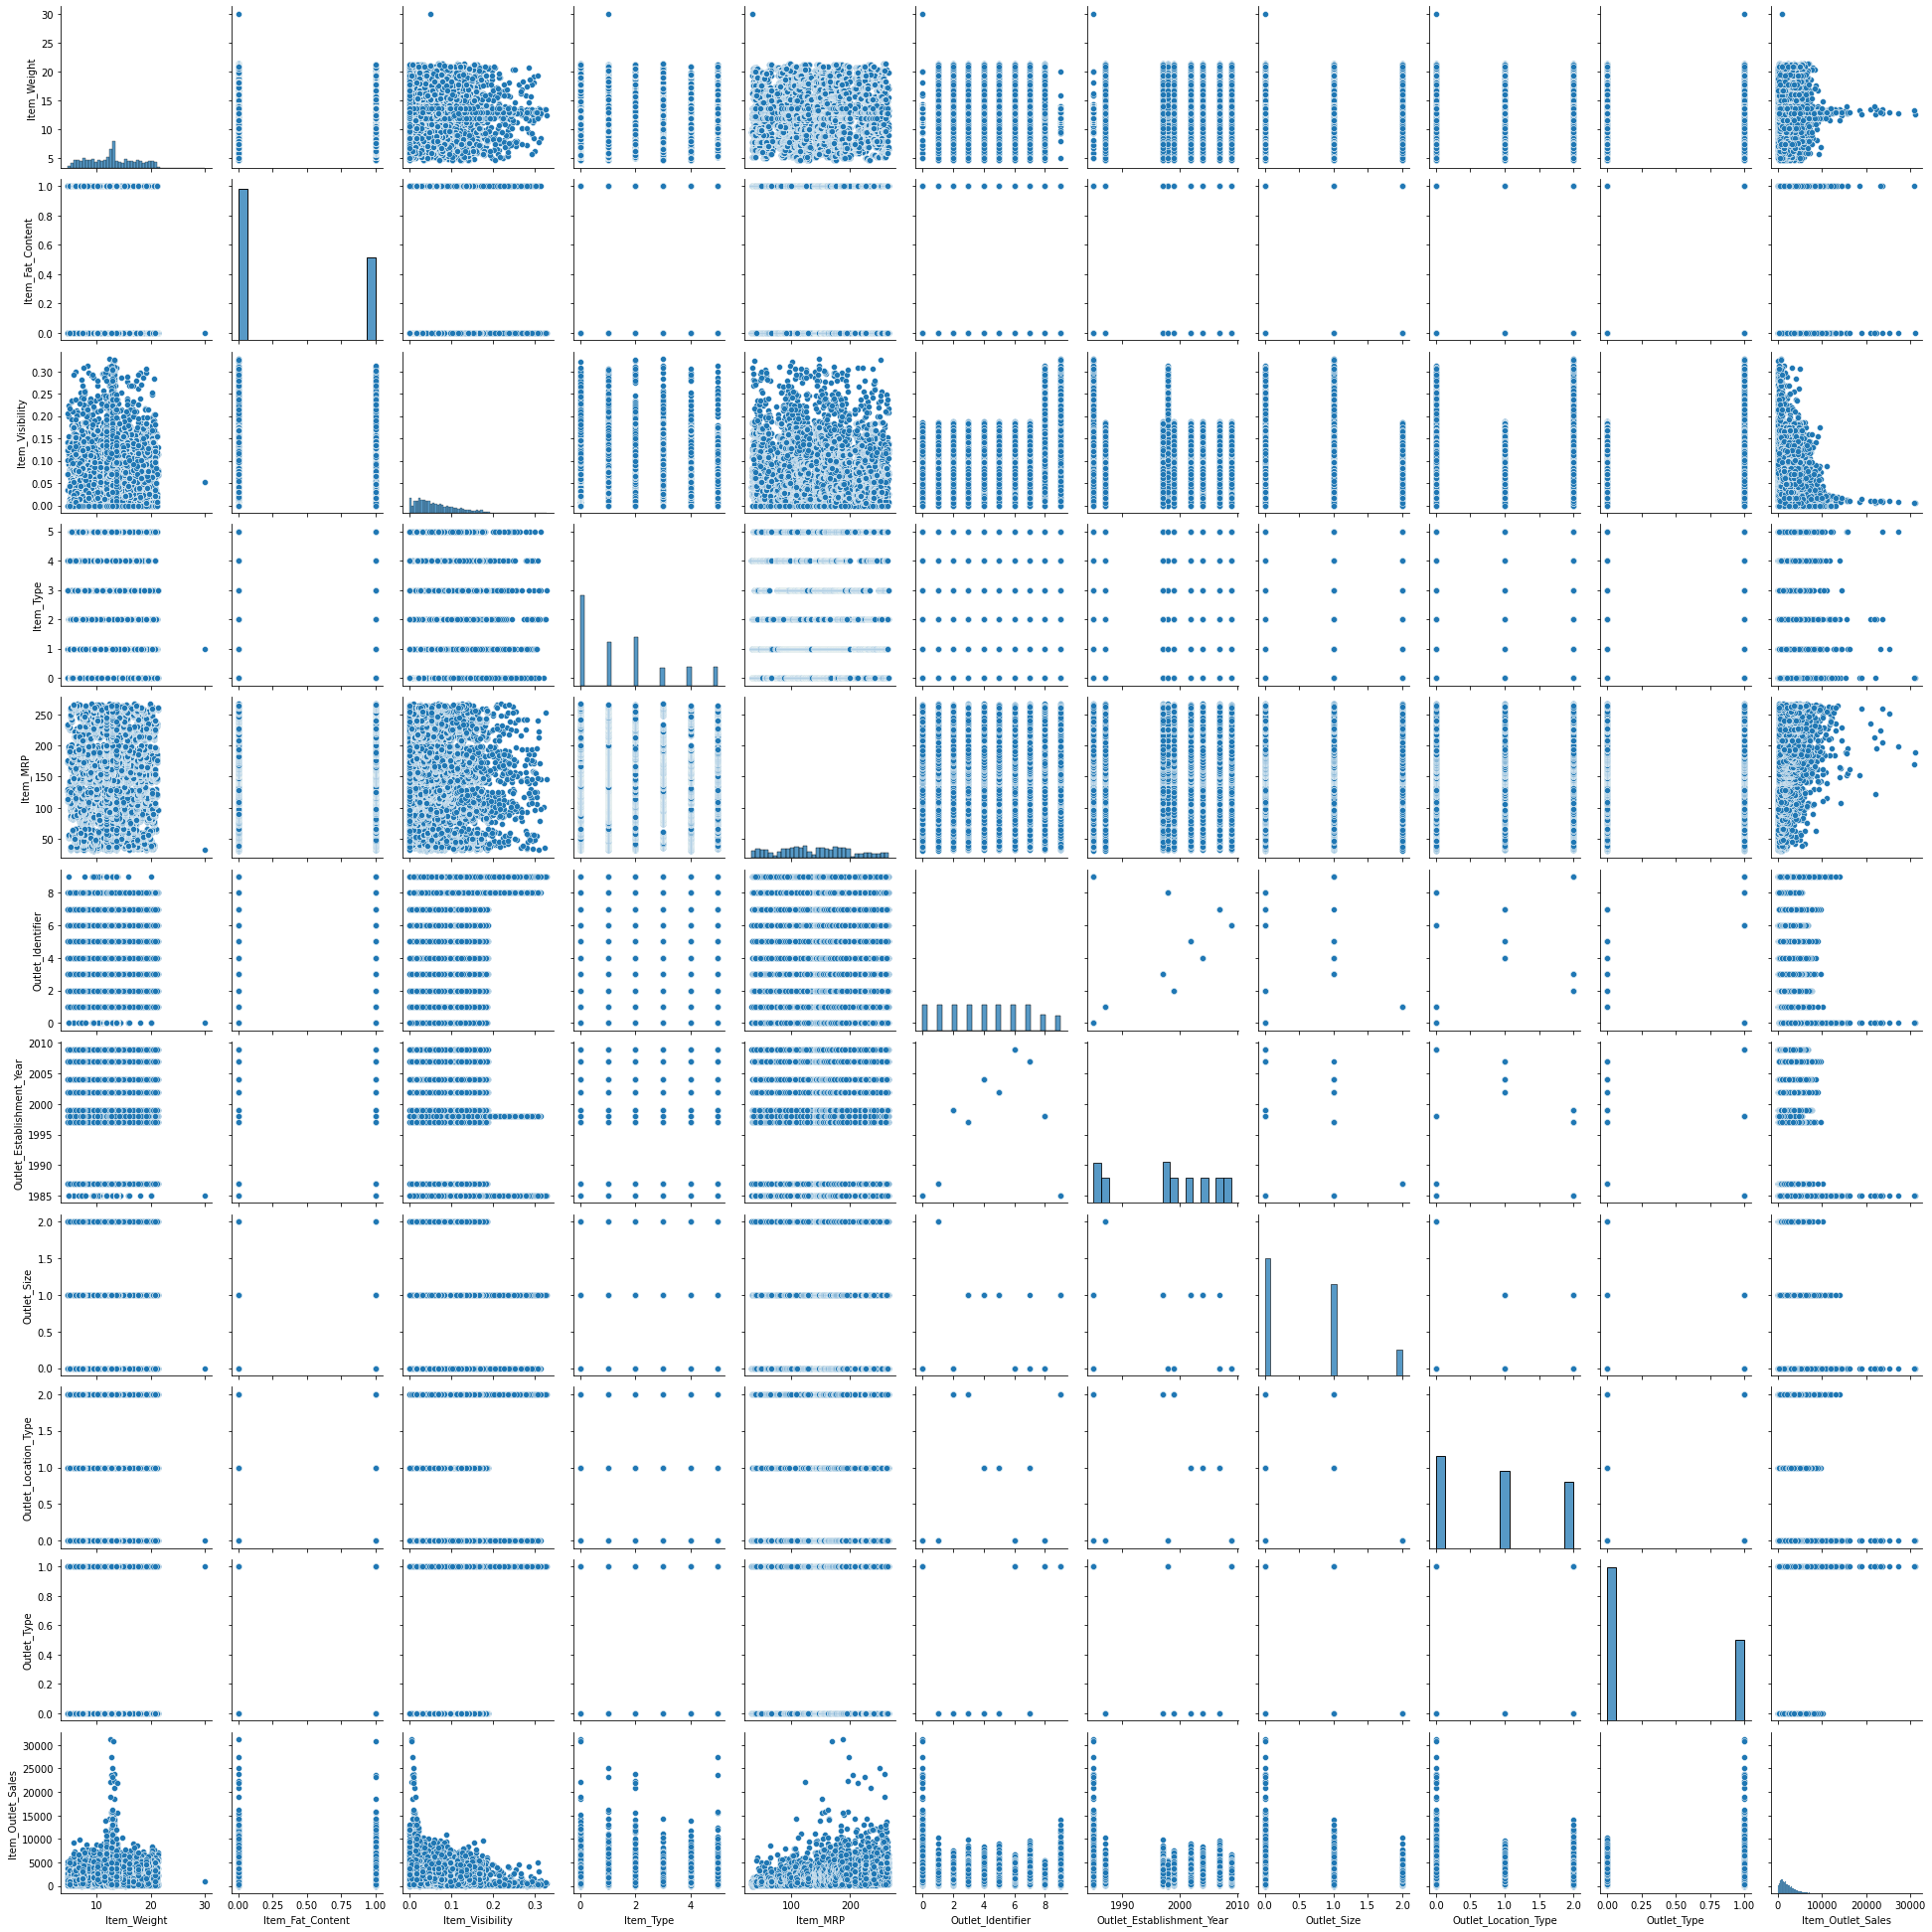

In [21]:
sns.pairplot(df)

In [22]:
y=df['Item_Outlet_Sales']

In [23]:
X = df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  int64  
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int64  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int64  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.1 MB


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
X = ss.fit_transform(X)

In [28]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04
mean,-1.171628e-17,8.769589e-15,-3.842205e-16,1.483841e-16,-1.419278e-16,-1.719345e-16,3.839055e-15,-1.151962e-16,3.765879e-17,1.148366e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.937326e+00,-7.392120e-01,-1.281712e+00,-9.473411e-01,-1.767181e+00,-1.519471e+00,-1.532686e+00,-8.992551e-01,-1.091566e+00,-7.268410e-01
25%,-8.211273e-01,-7.392120e-01,-7.563065e-01,-9.473411e-01,-7.569166e-01,-7.833672e-01,-1.293777e+00,-8.992551e-01,-1.091566e+00,-7.268410e-01
50%,2.201320e-03,-7.392120e-01,-2.318886e-01,-3.212753e-01,2.000528e-02,-4.726322e-02,1.396807e-01,-8.992551e-01,1.388604e-01,-7.268410e-01
75%,7.549589e-01,1.352792e+00,5.457876e-01,3.047906e-01,7.224096e-01,6.888407e-01,7.369545e-01,5.799596e-01,1.369286e+00,1.375817e+00
max,4.048273e+00,1.352792e+00,5.100167e+00,2.182988e+00,2.027606e+00,1.792997e+00,1.334228e+00,2.059174e+00,1.369286e+00,1.375817e+00


In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=2527)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9942, 10), (4262, 10), (9942,), (4262,))

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr = RandomForestRegressor(random_state=2529)

In [35]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

In [36]:
y_pred = rfr.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pred)

0.44399279875523934

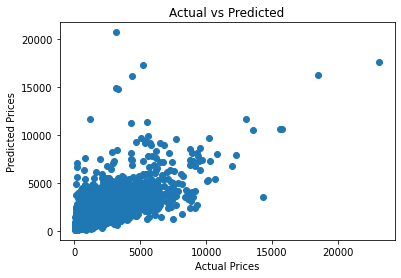

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.show()